In [2]:
import pandas as pd
from module import Data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

### Load the data

In [3]:
df = pd.read_csv('data/breast_cancer_data.csv')
df.drop(df.columns[-1], axis = 1, inplace = True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Instantiate the Data object

**indep_variable** is the name of the column holding the variable in question - i.e. "diagnosis" can be Benign (B) or Malignant (M)

**target_features** are the dependent variable(s) - i.e. ["radius_mean", "texture_mean"] 

**control_name** is the name of the variable in the indep_variable column representing the control group - i.e. "B" for benign


In [4]:
data = Data(
    df,
    indep_variable = "diagnosis",
    subgroup_variable = None,
    control_name = "B",
    target_features = df.columns[2:12]
)

### Generate descriptive statistics

In [5]:
data.descriptive('M')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440


### Create boxplots comparing the drug to control

Specify the group (in this case "M" for malignant) to compare to the control ("B" for benign)

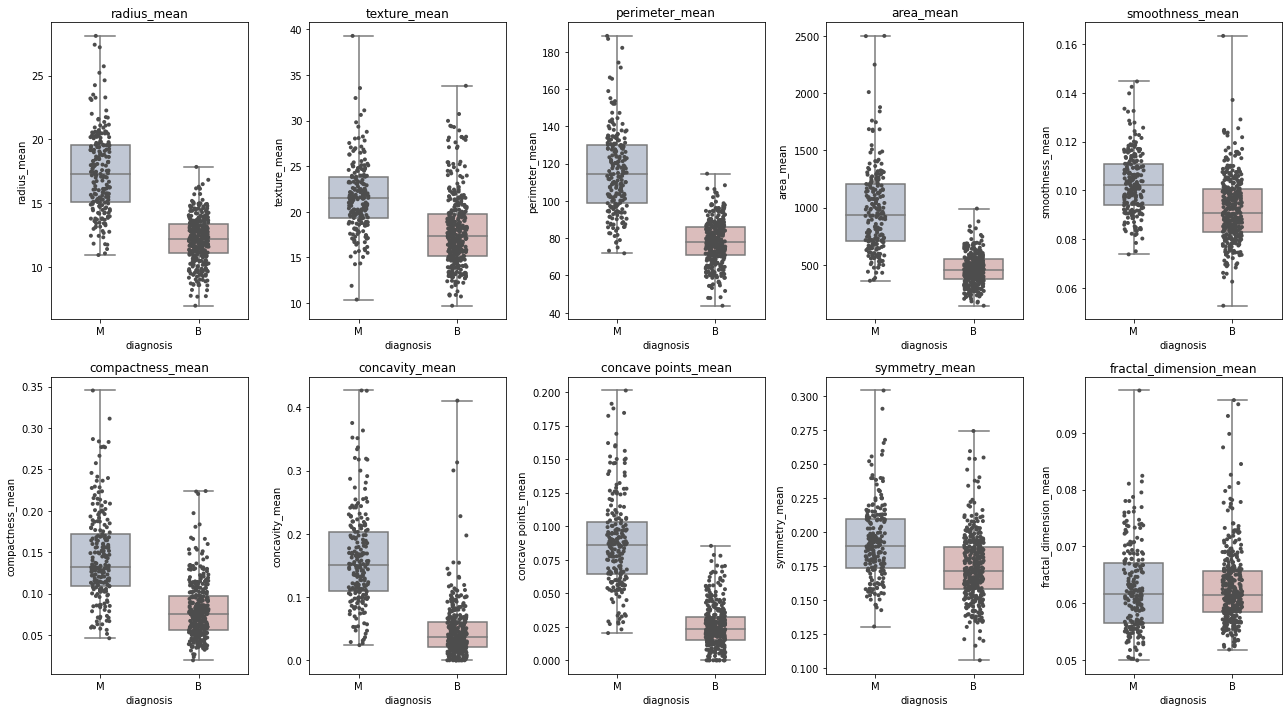

In [30]:
data.boxplot('M')

### Perform hypothesis testing 

Specify the group (in this case "M" for malignant) to compare to the control ("B" for benign)

Will output a Pandas dataframe of the results and recommended test

In [13]:
data.hypothesis('M')

,p-value,test
radius_mean,0.0,Mann-Whitney U
texture_mean,0.0,Mann-Whitney U
perimeter_mean,0.0,Mann-Whitney U
area_mean,0.0,Mann-Whitney U
smoothness_mean,0.0,Mann-Whitney U
compactness_mean,0.0,Mann-Whitney U
concavity_mean,0.0,Mann-Whitney U
concave points_mean,0.0,Mann-Whitney U


The program has chosen Mann-Whitney U test (for data with a non-normal distribution) and found an extremely small p-value. In other words we can reject the null hypothesis that the difference between these two groups occurs purely by chance

A p-value less than 0.05 is considered to be statistically significant